<a href="https://colab.research.google.com/github/shahnoorraza/Phishing-URLs-Detection-Using-Deep-Learning-Models/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatibl

## **Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
import nltk
from nltk.tokenize import RegexpTokenizer
import string
import gensim
from gensim.models import KeyedVectors
from gensim.models import FastText
from wordcloud import WordCloud, STOPWORDS
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout, Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, BatchNormalization, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Reshape, Flatten, Concatenate
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from keras.models import model_from_json
import pickle
import json
import logging
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import plot_model

## **Import Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Copy of data_url.csv')
df.head(5)

/tmp/ipython-input-3991716362.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/dataset/Copy of data_url.csv')


,Label,URL,Unnamed: 2
0,legitimate,https://oregonstateparks.org/index.cfm?do=geti...,NaN
1,phishing,http://business.hsbc.com.camaract.mobi/system_...,NaN
2,phishing,http://facebook.com-source-page.com/help/conta...,NaN
3,legitimate,http://michaelnielsen.org/blog/lecture-course-...,NaN
4,phishing,http://messagerie-17fr.com/fr/91da56ae94f5f4ff...,NaN


## **Remove Unwanted Column**

In [ ]:
urldata = df.drop('Unnamed: 2', axis=1)
urldata.head(5)
urldata.shape

(520285, 2)

## **Check for Null Values**

In [ ]:
urldata.isnull().sum()

,0
Label,0
URL,0


## **Check for Duplicate Values**

In [ ]:
duplicates = urldata[urldata.duplicated(subset='URL')]
print("Number of duplicate URLs:", duplicates.shape[0])
print(duplicates)

Number of duplicate URLs: 502
           Label                                                URL
3355    phishing  http://alvaroestrella.com/secure/webapps/mpp/h...
6166    phishing  http://alvaroestrella.com/secure/webapps/mpp/h...
8617    phishing  http://alvaroestrella.com/secure/webapps/mpp/h...
14870   phishing  http://alvaroestrella.com/secure/webapps/mpp/h...
15666   phishing  http://fb-com.es.vu/?amp;amp;amp;amp;amp;amp;a...
...          ...                                                ...
517943  phishing  http://paypal-com.us.webscrlcmdl.login.submit....
518090  phishing  http://eday.stickersmakeyoufaster.com/2b9bce9f...
518869  phishing  http://41.241.52.234/~andy/.secure/united.stat...
519639  phishing  http://www.bjcurio.com/js/index.htm?amp;app=co...
520081  phishing  http://justsomefacts.com/wp-content/themes/Nic...

[502 rows x 2 columns]


## **Remove Duplicate Values**

In [ ]:
df_no_duplicates_url = urldata.drop_duplicates(subset='URL')
print("Shape of DataFrame after removing duplicate URLs:", df_no_duplicates_url.shape)
df_no_duplicates_url.info()

Shape of DataFrame after removing duplicate URLs: (519783, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 519783 entries, 0 to 520284
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   519783 non-null  object
 1   URL     519783 non-null  object
dtypes: object(2)
memory usage: 11.9+ MB


In [ ]:
print(df_no_duplicates_url['Label'].value_counts())

Label
legitimate    288195
phishing      231588
Name: count, dtype: int64


In [ ]:
print(df_no_duplicates_url['Label'].unique())

['legitimate' 'phishing']


## **Graph for Unbalance Dataset**

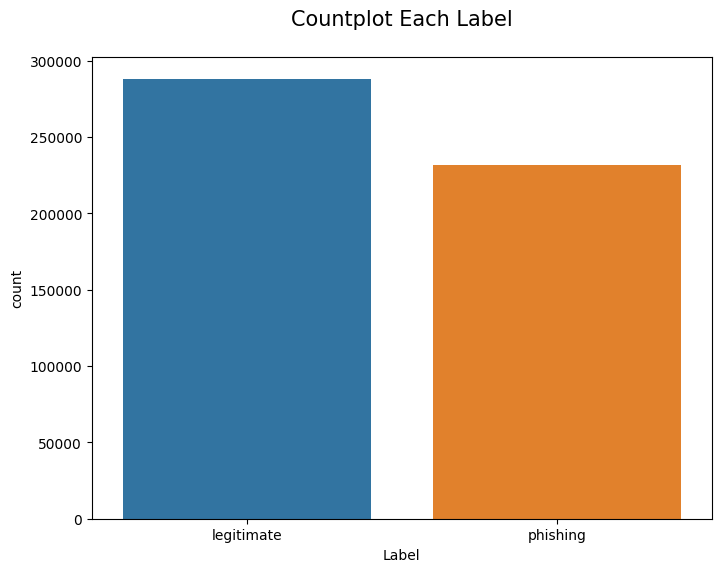

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df_no_duplicates_url.Label,hue='Label',data=df_no_duplicates_url)
plt.title('Countplot Each Label\n', fontsize=15)
plt.show()


## **Label Encoding Process**

In [ ]:
#Converting target variable into numerical form
lb = LabelEncoder()
#coding legitimate as 0 and phishing as 1
df_no_duplicates_url['Label']= lb.fit_transform(df_no_duplicates_url['Label'])
lb = LabelEncoder()
df_no_duplicates_url.head()

/tmp/ipython-input-1086639724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates_url['Label']= lb.fit_transform(df_no_duplicates_url['Label'])


,Label,URL
0,0,https://oregonstateparks.org/index.cfm?do=geti...
1,1,http://business.hsbc.com.camaract.mobi/system_...
2,1,http://facebook.com-source-page.com/help/conta...
3,0,http://michaelnielsen.org/blog/lecture-course-...
4,1,http://messagerie-17fr.com/fr/91da56ae94f5f4ff...


### **UnderSampling Process**

In [ ]:
df_0 = df_no_duplicates_url[df_no_duplicates_url['Label'] == 0]
df_1 = df_no_duplicates_url[df_no_duplicates_url['Label'] == 1]

df_1 = df_1.sample(n= 230000, random_state = 42)
df_0 = df_0.sample(n= 230000, random_state = 42)

In [ ]:
urldata1 = pd.concat([df_0, df_1], ignore_index = True)
urldata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460000 entries, 0 to 459999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Label   460000 non-null  int64 
 1   URL     460000 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


# **Balance Dataset Graph**

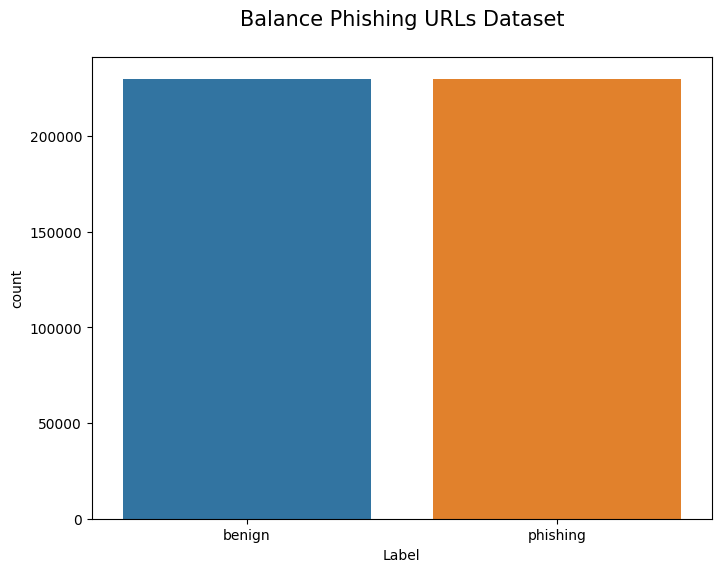

In [ ]:
df_label = urldata1['Label'].replace({0: 'benign',
                               1: 'phishing'})

plt.figure(figsize=(8,6))
sns.countplot(x=df_label,hue=df_label,data=urldata1)
plt.title('Balance Phishing URLs Dataset\n', fontsize=15)
plt.show()

In [ ]:
urldata1['Label'].value_counts()

,count
Label,
0,230000
1,230000


## **Lowercasing Process**

In [ ]:
# Preprocessing Stage - Lowercasing all URLs
urldata1['URL'] = urldata1['URL'].str.lower()
urldata1.head(5)

,Label,URL
0,0,https://www.survio.com/survey/d/q6k0h2k4k0v5a8l5a
1,0,http://younoodle.com/people/kate_klingensmith
2,0,https://www.techradar.com/sg/reviews/lg-gram-13
3,0,https://regionsyddanmark.dk/wm506697
4,0,https://www.absolventa.de/jobs/channel/ingenie...


## **Data Tokenization Process**

In [ ]:
def tokenize_url(url):
    tokens = re.split(r'([.?/\-_=%&@+;])', url)  # Keep the delimiters as tokens
    tokens = [token for token in tokens if token.strip()]  # Remove empty tokens
    return tokens
urldata1['text_tokenized'] = urldata1['URL'].apply(tokenize_url)
print(urldata1[['URL', 'text_tokenized']].head(5))

                                                 URL  \
0  https://www.survio.com/survey/d/q6k0h2k4k0v5a8l5a   
1      http://younoodle.com/people/kate_klingensmith   
2    https://www.techradar.com/sg/reviews/lg-gram-13   
3               https://regionsyddanmark.dk/wm506697   
4  https://www.absolventa.de/jobs/channel/ingenie...   

                                      text_tokenized  
0  [https:, /, /, www, ., survio, ., com, /, surv...  
1  [http:, /, /, younoodle, ., com, /, people, /,...  
2  [https:, /, /, www, ., techradar, ., com, /, s...  
3  [https:, /, /, regionsyddanmark, ., dk, /, wm5...  
4  [https:, /, /, www, ., absolventa, ., de, /, j...  


## **Setting Vocabulary Size**

In [ ]:
# Setting Vocabulary Size to All Words in the Dataset
tokenizer = Tokenizer(filters='')  # Don't filter out any characters
tokenizer.fit_on_texts(urldata1['text_tokenized'])
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 639507


## **FastText**

In [ ]:
# Preparing corpus for FastText
corpus = urldata1['text_tokenized'].tolist()

# Word Embedding Using FastText
fasttext_model = FastText(sentences=corpus, vector_size=300, window=5, min_count=5, workers=4)

# Creating an embedding matrix
embedding_matrix = np.zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    if word in fasttext_model.wv:
        embedding_matrix[index] = fasttext_model.wv[word]

## **Setting Maximum Number of word**

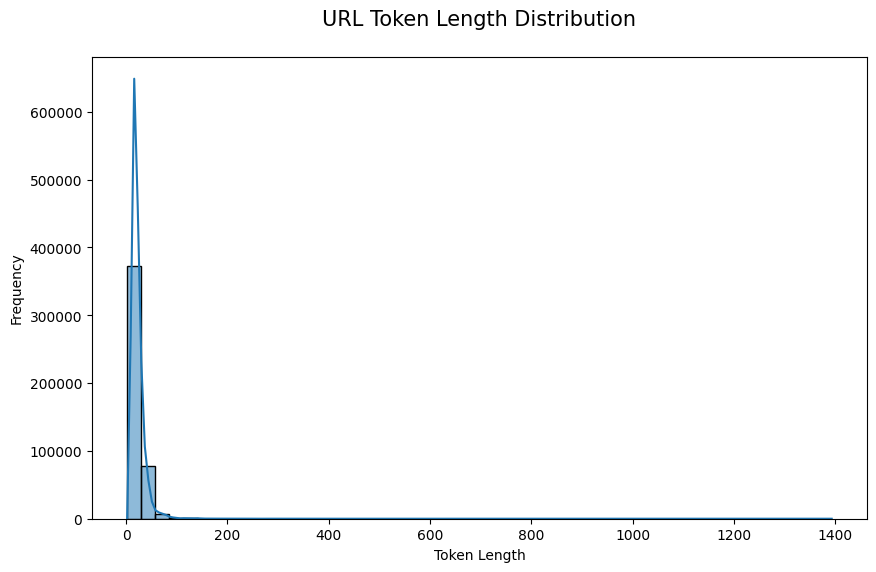

In [ ]:
# Step 7: Plotting URL Length Distribution and Choosing Maximum Length
urldata1['token_length'] = urldata1['text_tokenized'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(urldata1['token_length'], bins=50, kde=True)
plt.title('URL Token Length Distribution\n', fontsize=15)
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Find the maximum length of tokenized URLs
max_len1 = urldata1['text_tokenized'].apply(len).max()
print("Maximum number of words in URL:", max_len1)

Maximum number of words in URL: 1393


In [ ]:
# Set a reasonable maximum length (e.g., 95th percentile)
max_len2 = int(urldata1['token_length'].quantile(0.95))
print("Chosen maximum number of words in URL:", max_len2)

Chosen maximum number of words in URL: 45


## **Converting Tokens into Sequence**

In [ ]:
sequences = tokenizer.texts_to_sequences(urldata1['text_tokenized'])

In [ ]:

longest = max(len(seq) for seq in sequences)
print("Longest URL size: {}".format(longest))
average = np.mean([len(seq) for seq in sequences])
print("Average URL size: {}".format(average))
stdev = np.std([len(seq) for seq in sequences])
print("Stdev of URL size: {}".format(stdev))
max_len3 = int(average + stdev * 3)
print('Max URL size: {}'.format(max_len3))

Longest URL size: 1393
Average URL size: 22.850995652173914
Stdev of URL size: 15.460572641399189
Max URL size: 69


## **Dataset Splitting**

In [ ]:
X = pad_sequences(sequences, maxlen=max_len3, padding='post', truncating='post')

In [ ]:
# Using stratify to maintain the proportion of labels in both training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, urldata1['Label'], test_size=0.20, random_state=42, shuffle=True, stratify=urldata1['Label'])

In [ ]:
# Check the size of the test set
print(f"Total number of samples in the test set: {len(X_test)}")

# Count and display the number of benign and phishing URLs in y_test
label_counts = y_test.value_counts()

print(f"Benign URLs: {label_counts[0]}")  # Assuming 0 is the label for benign
print(f"Phishing URLs: {label_counts[1]}")  # Assuming 1 is the label for phishing

Total number of samples in the test set: 92000
Benign URLs: 46000
Phishing URLs: 46000
